In [1]:
include("../src/MCMCDiffusion.jl")

MCMCDiffusion

In [2]:
using MCMCDiffusion, DynamicalBilliards

In [3]:
using Plots, LaTeXStrings, SpecialFunctions

In [4]:
pyplot()

Plots.PyPlotBackend()

In [5]:
##Defining the Billiard

T = Float64 ##Type (It can be changed)

space = T(2.2) # Space between two adjacent disks
r = T(1.0) # Radius of the disk

polygon_sides = n = 6

bt =  billiard_polygon(polygon_sides, space/sqrt(3); setting = "periodic")
d = Disk(([T(0.),T(0.)]), r)
push!(bth, d);

LoadError: [91mUndefVarError: bth not defined[39m

In [6]:
## Direct Sampling
to = 20.
N = 10^5
distances = zeros(N)
 for i in 1:N
     p = randominitialcondition(bt).particle
     distances[i] = MCMCDiffusion.distance(p, bt, 20.)
 end


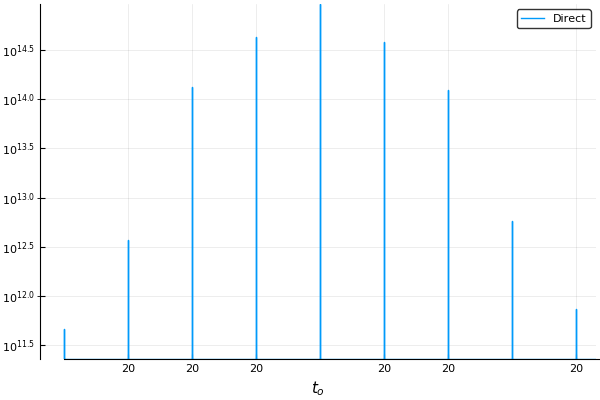

In [7]:
stephist(distances, normed = true, yscale = :log10,
    label = "Direct", xlabel = L"t_o")

In [8]:
N = 10^5
beta = -1.
to = 20.
D = 0.17 ##Reported diffusion coefficient for these parameters
chaotic_results, acceptance = rMCMC(to, N, bt, beta, D)

([20.0; 20.0; … ; 20.0; 20.0], 1.0)


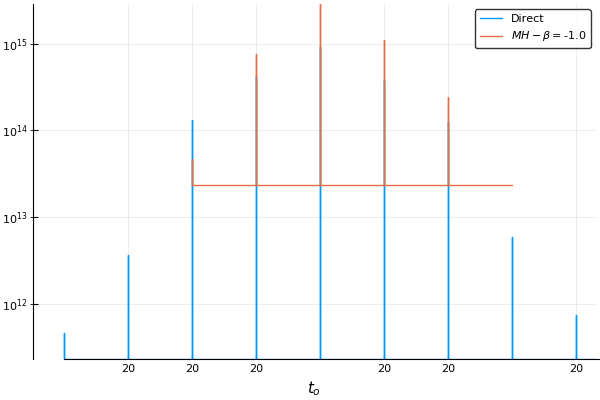

In [9]:
MH_dist = chaotic_results
stephist!(MH_dist, normed = true, label = L"MH - \beta ="*"$beta",
    yscale = :log10)